In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.autograd.profiler as profiler
from scipy.constants import *
import time

from simulator import *
from utils import *
from physics import *

device = "cuda" if torch.cuda.is_available() else "cpu"
set_seed(2304)

In [9]:
Lx, Ly = 2.0, 2.0
Nx, Ny = 64, 64
dt = 1e-4
simulation_time = 0.1
normalization = 1.0
backend = "cpu"

sim = Space(
    Lx=Lx,
    Ly=Ly,
    Nx=Nx,
    Ny=Ny,
    simulation_time=simulation_time,
    dt=dt,
    normalization=normalization,
    boundaries_type="periodic",
    save_frequency=10,
    backend= backend,
)

sim.poisson_method = "gauss_seidel"

# Creiamo una particella con q=1, m=1, velocità iniziale in x
sim.create_new_specie(
    name="single_particle_B",
    num_particles=1,
    temperature=0.0,
    distribution="zero",
    disposition="specific",
    position=[1.0, 1.0],
    mass=1.0,
    charge=1.0
)

# Imposta velocità iniziale
sim.particles_velocity[0, 0] = 1.0  # vx
sim.particles_velocity[0, 1] = 0.0  # vy
sim.particles_velocity[0, 2] = 0.0

# Definisci un campo magnetico uniforme Bz
Bz = 0.0001
sim.define_constant_magnetic_field(
    x_min=0, x_max=Lx,
    y_min=0, y_max=Ly,
    bz=Bz
)

# Rimuoviamo eventuale contributo di campo elettrico
sim.fields[:, :, 0, :] = 0.0

sim.simulate()

# La traiettoria dovrebbe essere una circonferenza con raggio = v_perp / omega_c = 1 / (qB/m) = 1 se q=1, m=1, B=1
# Analisi finale
final_position = sim.particles_position[0].cpu().numpy()
print("Posizione finale:", final_position)
final_velocity = sim.particles_velocity[0].cpu().numpy()
print("Velocità finale:", final_velocity)



 14%|█▍        | 145/1000 [04:17<25:19,  1.78s/ step]


KeyboardInterrupt: 

In [11]:
final_velocity = sim.particles_velocity[0].cpu().numpy()
print("Velocità finale:", final_velocity)

Velocità finale: [-5.0654904e+07  1.6128568e+07 -9.9773438e+01]


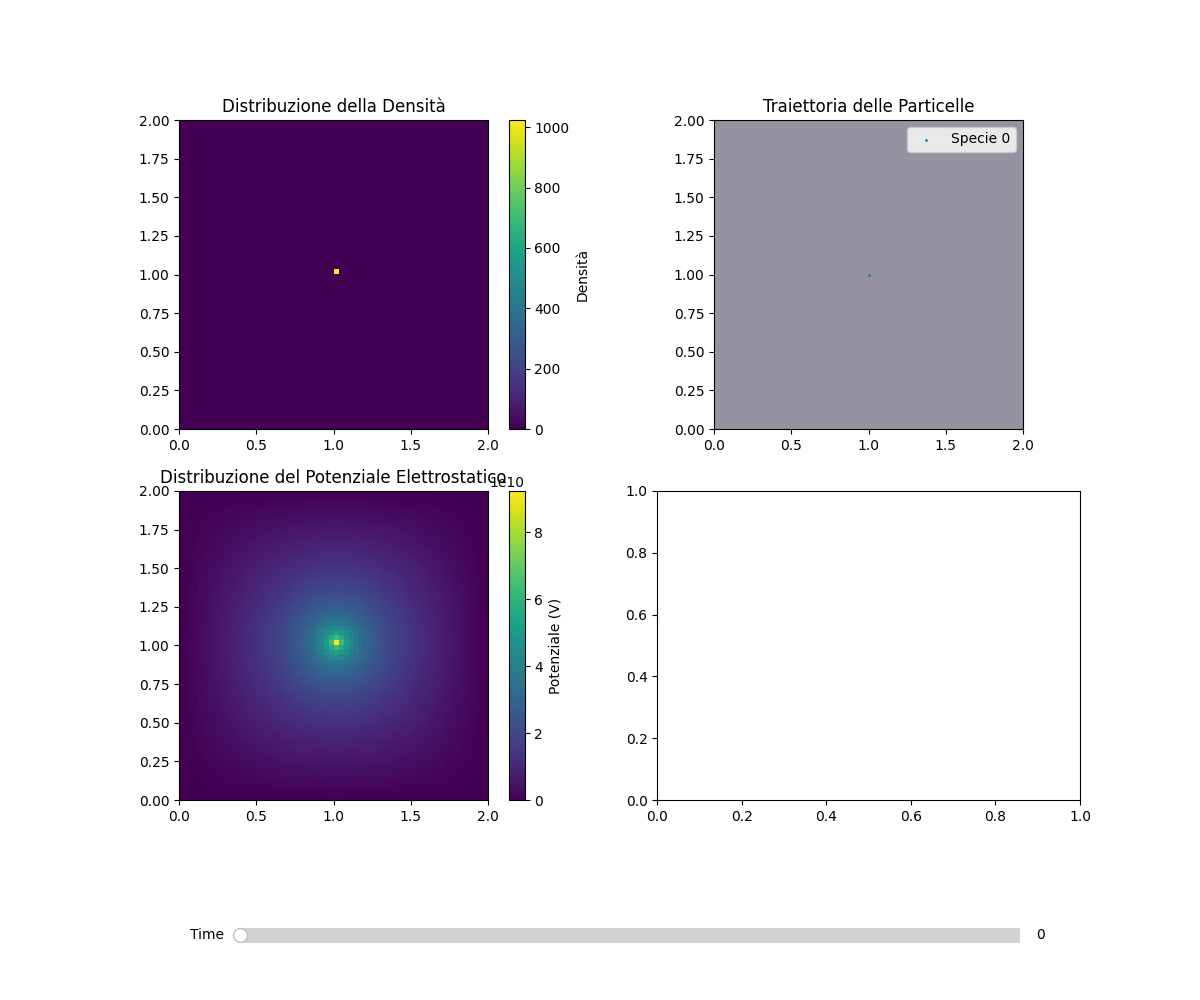

In [10]:
%matplotlib widget
particles_position_chronology = sim.particles_position_chronology
particles_velocity_chronology = sim.particles_velocity_chronology
fields_chronology = sim.fields_chronology
grid_chronology = sim.grid_chronology
particles_specie_chronology = sim.particles_specie_chronology
kinetic_energy_chronology = sim.kinetic_energy_chronology
potential_energy_chronology = sim.potential_energy_chronology
mechanic_energy_chronology = sim.mechanic_energy_chronology
particles_position_chronology = torch.stack(particles_position_chronology).cpu().numpy()
particles_velocity_chronology = torch.stack(particles_velocity_chronology).cpu().numpy()
fields_chronology = torch.stack(fields_chronology).cpu().numpy()
grid_chronology = torch.stack(grid_chronology).cpu().numpy()
particles_specie_chronology = torch.stack(particles_specie_chronology).cpu().numpy()
kinetic_energy_chronology = np.array(kinetic_energy_chronology)
potential_energy_chronology = np.array(potential_energy_chronology)
mechanic_energy_chronology = np.array(mechanic_energy_chronology)



dynamic_slider(fields_chronology, grid_chronology, particles_position_chronology, particles_specie_chronology, Lx, Ly, sim.solid_mask.cpu().numpy(), sim.fixed_potential_value.cpu().numpy())